In [ ]:
Link to Google shared folder containing all the raw data files  https://drive.google.com/drive/u/0/folders/15lxCFZO6CRpvmwRSy4yv9v2kHSkGzSSU
#General Qestion: crip mobility challenges for low income earners
#The financially strained DIS-ability group
#import necessary libraries
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
os.chdir('//content/drive/MyDrive/FinalProject_Abdulrazaq')
#whats in my directory?
os.listdir()

Mounted at /content/drive


['MTA',
 'NYCensusTracts0.25fromStationWithIncome',
 '.ipynb_checkpoints',
 '__pycache__',
 'untitled',
 'map.html',
 'cache',
 'Borough Boundaries',
 'NYCBoroughBoundDissolved',
 'large_scale_map.eps',
 ' DraftFinal Project_SBABDUL.ipynb']

In [ ]:
#Load MTA subway stations and complexes shapefile
#Read shapefile
#data does not have shapefile format, so i exported features from ArcGIs, hoping thats ecceptable
mta_stations = gpd.read_file('//content/drive/MyDrive/FinalProject_Abdulrazaq/MTA')

In [ ]:
#preview
mta_stations.head()
#mta_stations.plot()

,Complex_ID,Is_Complex,Number_Of_,Stop_Name,Display_Na,Constituen,Station_ID,GTFS_Stop_,Borough,Daytime_Ro,Structure_,Latitude,Longitude,ADA,ADA_Notes,geometry
0,1,FALSE,1,Astoria-Ditmars Blvd,Astoria-Ditmars Blvd (N W),Astoria-Ditmars Blvd,1,R01,Q,N W,Elevated,40.775036,-73.912034,0,None,POINT (-73.91203 40.77504)
1,2,FALSE,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,N W,Elevated,40.770258,-73.917843,1,None,POINT (-73.91784 40.77026)
2,3,FALSE,1,30 Av,30 Av (N W),30 Av,3,R04,Q,N W,Elevated,40.766779,-73.921479,0,None,POINT (-73.92148 40.76678)
3,4,FALSE,1,Broadway,Broadway (N W),Broadway,4,R05,Q,N W,Elevated,40.761820,-73.925508,0,None,POINT (-73.92551 40.76182)
4,5,FALSE,1,36 Av,36 Av (N W),36 Av,5,R06,Q,N W,Elevated,40.756804,-73.929575,0,None,POINT (-73.92957 40.75680)


In [ ]:
#Exploratory analysis
#Entries count
# Count the total number of stations #some complexes have multiple stations. unique values = 0,1,2, cant use boolean method
total_stations_count = mta_stations.shape[0] - 1 #1 is the row header - removing that from the count
total_stations_count

444

In [ ]:
# Count how many ADA Accessible  stations are there in total
ada_accessible_count = mta_stations['ADA'].sum()
ada_accessible_count

136

In [ ]:
#dropping complex information which I wontt need
mta_stations = mta_stations.drop(columns=['Complex_ID','Is_Complex', 'ADA_Notes'])
mta_stations

,Number_Of_,Stop_Name,Display_Na,Constituen,Station_ID,GTFS_Stop_,Borough,Daytime_Ro,Structure_,Latitude,Longitude,ADA,geometry
0,1,Astoria-Ditmars Blvd,Astoria-Ditmars Blvd (N W),Astoria-Ditmars Blvd,1,R01,Q,N W,Elevated,40.775036,-73.912034,0,POINT (-73.91203 40.77504)
1,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,N W,Elevated,40.770258,-73.917843,1,POINT (-73.91784 40.77026)
2,1,30 Av,30 Av (N W),30 Av,3,R04,Q,N W,Elevated,40.766779,-73.921479,0,POINT (-73.92148 40.76678)
3,1,Broadway,Broadway (N W),Broadway,4,R05,Q,N W,Elevated,40.761820,-73.925508,0,POINT (-73.92551 40.76182)
4,1,36 Av,36 Av (N W),36 Av,5,R06,Q,N W,Elevated,40.756804,-73.929575,0,POINT (-73.92957 40.75680)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,4,Fulton St,Fulton St (2 3 4 5 A C J Z),Fulton St,106; 172; 332; 412,229; 418; A38; M22,M,2 3 4 5 A C J Z,Subway,40.710089,-74.007838,1,POINT (-74.00784 40.71009)
441,2,Metropolitan Av/Lorimer St,Metropolitan Av/Lorimer St (G L),Lorimer St; Metropolitan Av,121; 285,G29; L10,Bk,G L,Subway,40.713428,-73.950846,1,POINT (-73.95085 40.71343)
442,2,Myrtle-Wyckoff Avs,Myrtle-Wyckoff Avs (M L),Myrtle-Wyckoff Avs,112; 128,L17; M08,Bk,M L,Elevated; Subway,40.699622,-73.911986,1,POINT (-73.91199 40.69962)
443,2,Whitehall St-South Ferry,Whitehall St-South Ferry (1 R W),South Ferry; Whitehall St-South Ferry,23; 330,142; R27,M,1 R W,Subway,40.702577,-74.013329,2,POINT (-74.01333 40.70258)


In [ ]:
print(mta_stations['ADA'].unique())

[0 1 2]


In [ ]:
# Filter the dataset to retain only ADA accessible stations
ada_accessible_stations = mta_stations[mta_stations['ADA'] > 0]
ada_accessible_stations


,Number_Of_,Stop_Name,Display_Na,Constituen,Station_ID,GTFS_Stop_,Borough,Daytime_Ro,Structure_,Latitude,Longitude,ADA,geometry
1,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,N W,Elevated,40.770258,-73.917843,1,POINT (-73.91784 40.77026)
7,1,57 St-7 Av,57 St-7 Av (N Q R W),57 St-7 Av,9,R14,M,N Q R W,Subway,40.764664,-73.980658,1,POINT (-73.98066 40.76466)
8,1,49 St,49 St (N R W),49 St,10,R15,M,N R W,Subway,40.759901,-73.984139,2,POINT (-73.98414 40.75990)
15,1,DeKalb Av,DeKalb Av (B Q R),DeKalb Av,26,R30,Bk,B Q R,Subway,40.690635,-73.981824,1,POINT (-73.98182 40.69064)
22,1,59 St,59 St (N R),59 St,35,R41,Bk,N R,Subway,40.641362,-74.017881,1,POINT (-74.01788 40.64136)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,4,Fulton St,Fulton St (2 3 4 5 A C J Z),Fulton St,106; 172; 332; 412,229; 418; A38; M22,M,2 3 4 5 A C J Z,Subway,40.710089,-74.007838,1,POINT (-74.00784 40.71009)
441,2,Metropolitan Av/Lorimer St,Metropolitan Av/Lorimer St (G L),Lorimer St; Metropolitan Av,121; 285,G29; L10,Bk,G L,Subway,40.713428,-73.950846,1,POINT (-73.95085 40.71343)
442,2,Myrtle-Wyckoff Avs,Myrtle-Wyckoff Avs (M L),Myrtle-Wyckoff Avs,112; 128,L17; M08,Bk,M L,Elevated; Subway,40.699622,-73.911986,1,POINT (-73.91199 40.69962)
443,2,Whitehall St-South Ferry,Whitehall St-South Ferry (1 R W),South Ferry; Whitehall St-South Ferry,23; 330,142; R27,M,1 R W,Subway,40.702577,-74.013329,2,POINT (-74.01333 40.70258)


In [ ]:
# Count how many stations are ADA accessible : non-zero values indicate ADA accessibility. Then, count the number of True values,
ada_accessible_count = (mta_stations['ADA'] > 0).sum()
ada_accessible_count
# #put accessible stations in a dataframe
# ada_accessible_stations.head()

123

In [ ]:
#convert the data type of the 'ADA'column  to integer
mta_stations['ADA'] = mta_stations['ADA'].astype(int)

In [ ]:
# #Load census tract shapefile - the one buffered to accomodate adjoining census tracts
census_tracts = gpd.read_file('//content/drive/MyDrive/FinalProject_Abdulrazaq/NYCensusTracts0.25fromStationWithIncome')

In [ ]:
census_tracts.head()

,STATE_ABBR,STATE_FIPS,COUNTY_FIP,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,...,Estimat_56,Estimat_57,Estimat_58,Estimat_59,Estimat_60,Estimat_61,Estimat_62,Estimat_63,FIPS_TEXT,geometry
0,NY,36,005,36005,038000,36005038000,4775,59687.5,0.08,4938,...,6.2,0.0,6.4,40924,78485,(X),(X),29.7,36005038000,"POLYGON ((-73.86008 40.87629, -73.86051 40.875..."
1,NY,36,005,36005,023302,36005023302,3523,176150.0,0.02,3574,...,7.4,0.0,8.4,55435,68347,(X),(X),32.9,36005023302,"POLYGON ((-73.90328 40.84870, -73.90240 40.848..."
2,NY,36,005,36005,022901,36005022901,5796,115920.0,0.05,5766,...,5.2,0.0,4.5,20350,42231,(X),(X),29.2,36005022901,"POLYGON ((-73.90462 40.84740, -73.90483 40.845..."
3,NY,36,005,36005,026701,36005026701,3930,131000.0,0.03,3983,...,9.6,0.0,0.0,14531,30941,(X),(X),25.8,36005026701,"POLYGON ((-73.89892 40.86967, -73.89960 40.868..."
4,NY,36,005,36005,021301,36005021301,1277,63850.0,0.02,1264,...,0.0,0.0,0.0,-,44657,(X),(X),50.0,36005021301,"POLYGON ((-73.91971 40.84612, -73.91919 40.846..."


<Axes: >

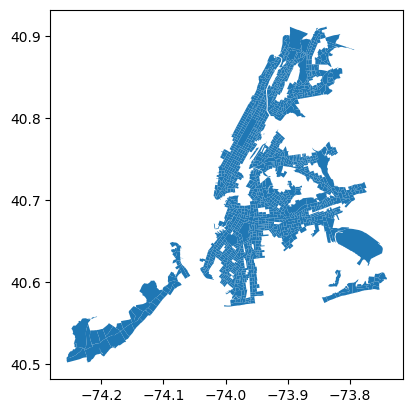

In [ ]:
#preview
census_tracts.plot()

In [ ]:
#dropping some unnecesssary columns
census_tracts = census_tracts.drop(columns=['STATE_ABBR', 'STATE_FIPS', 'COUNTY_FIP'])
census_tracts

,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,Estimat_56,Estimat_57,Estimat_58,Estimat_59,Estimat_60,Estimat_61,Estimat_62,Estimat_63,FIPS_TEXT,geometry
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,6.2,0.0,6.4,40924,78485,(X),(X),29.7,36005038000,"POLYGON ((-73.86008 40.87629, -73.86051 40.875..."
1,36005,023302,36005023302,3523,176150.0,0.02,3574,178700.0,0.012272,0.012272,...,7.4,0.0,8.4,55435,68347,(X),(X),32.9,36005023302,"POLYGON ((-73.90328 40.84870, -73.90240 40.848..."
2,36005,022901,36005022901,5796,115920.0,0.05,5766,115320.0,0.016461,0.016461,...,5.2,0.0,4.5,20350,42231,(X),(X),29.2,36005022901,"POLYGON ((-73.90462 40.84740, -73.90483 40.845..."
3,36005,026701,36005026701,3930,131000.0,0.03,3983,132766.7,0.011947,0.011947,...,9.6,0.0,0.0,14531,30941,(X),(X),25.8,36005026701,"POLYGON ((-73.89892 40.86967, -73.89960 40.868..."
4,36005,021301,36005021301,1277,63850.0,0.02,1264,63200.0,0.012900,0.012900,...,0.0,0.0,0.0,-,44657,(X),(X),50.0,36005021301,"POLYGON ((-73.91971 40.84612, -73.91919 40.846..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,36085,002700,36085002700,2036,20360.0,0.10,2049,20490.0,0.021045,0.021045,...,12.3,0.0,0.0,-,36992,(X),(X),53.8,36085002700,"POLYGON ((-74.07484 40.62523, -74.07440 40.624..."
1410,36085,000600,36085000600,2852,10969.2,0.26,2859,10996.2,0.066291,0.066291,...,6.0,4.0,0.0,16389,35528,(X),(X),33.6,36085000600,"POLYGON ((-74.07267 40.62676, -74.07261 40.626..."
1411,36085,003600,36085003600,2827,17668.8,0.16,2792,17450.0,0.032594,0.032594,...,7.2,0.0,0.0,56250,57705,(X),(X),38.6,36085003600,"POLYGON ((-74.07781 40.60631, -74.07787 40.606..."
1412,36119,003000,36119003000,3258,23271.4,0.14,3228,23057.1,0.036971,0.036971,...,11.1,0.0,0.0,50365,49725,(X),(X),31.9,36119003000,"POLYGON ((-73.84364 40.90744, -73.84458 40.907..."


In [ ]:
# instead retain onlty required columns
household_income = ['STCOFIPS', 'TRACT_FIPS', 'FIPS', 'POPULATION', 'POP_SQMI', 'SQMI',
       'POPULATI_1', 'POP20_SQMI', 'Shape_Leng', 'Shape_Le_1', 'Shape_Area',
       'Geography', 'FIPS_1', 'Geographic', 'Estimate__', 'Estimate_1',
       'Estimate_2', 'Estimate_3', 'Estimate_4', 'Estimate_5', 'Estimate_6',
       'Estimate_7', 'Estimate_8', 'Estimate_9', 'Estimat_10', 'Estimat_11',
       'Estimat_12', 'geometry' ]

# Select only the desired columns and assign them back to the census tractss GeoDataFrame
census_tracts = census_tracts[household_income]

census_tracts.head()

,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,Estimate_4,Estimate_5,Estimate_6,Estimate_7,Estimate_8,Estimate_9,Estimat_10,Estimat_11,Estimat_12,geometry
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,6.6,13.5,13.8,11.7,9.8,2.9,3.6,41942,66674,"POLYGON ((-73.86008 40.87629, -73.86051 40.875..."
1,36005,023302,36005023302,3523,176150.0,0.02,3574,178700.0,0.012272,0.012272,...,2.0,14.0,23.2,13.9,11.1,3.1,2.4,52092,61361,"POLYGON ((-73.90328 40.84870, -73.90240 40.848..."
2,36005,022901,36005022901,5796,115920.0,0.05,5766,115320.0,0.016461,0.016461,...,0.0,9.6,21.9,9.1,14.8,2.7,1.7,50023,57417,"POLYGON ((-73.90462 40.84740, -73.90483 40.845..."
3,36005,026701,36005026701,3930,131000.0,0.03,3983,132766.7,0.011947,0.011947,...,4.3,15.7,10.0,10.8,21.0,5.5,1.8,49167,64137,"POLYGON ((-73.89892 40.86967, -73.89960 40.868..."
4,36005,021301,36005021301,1277,63850.0,0.02,1264,63200.0,0.012900,0.012900,...,21.6,10.6,17.9,11.6,3.4,2.4,2.6,34470,50771,"POLYGON ((-73.91971 40.84612, -73.91919 40.846..."


In [ ]:
#Rename relevant columns
column_rename_map = {
    'Estimate_': 'Household_Total',
    'Estimate_1': 'Less_than_10k',
    'Estimate_2': '10_14k9',
    'Estimate_3': '15-24k9',
    'Estimate_4': '25_34k9',
    'Estimate_5': '35_49k9',
    'Estimate_6': '50_74k9',
    'Estimate_7': '75_99k9',
    'Estimate_8': '100_149k9',
    'Estimate_9': '150_199k9',
    'Estimat_10': '>=200',
    'Estimat_11': 'Household_median_income',
    'Estimat_12': 'Mean_income',}

census_tracts.rename(columns=column_rename_map, inplace=True)
census_tracts

<ipython-input-16-f4f40cb82754>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tracts.rename(columns=column_rename_map, inplace=True)


,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,25_34k9,35_49k9,50_74k9,75_99k9,100_149k9,150_199k9,>=200,Household_median_income,Mean_income,geometry
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,6.6,13.5,13.8,11.7,9.8,2.9,3.6,41942,66674,"POLYGON ((-73.86008 40.87629, -73.86051 40.875..."
1,36005,023302,36005023302,3523,176150.0,0.02,3574,178700.0,0.012272,0.012272,...,2.0,14.0,23.2,13.9,11.1,3.1,2.4,52092,61361,"POLYGON ((-73.90328 40.84870, -73.90240 40.848..."
2,36005,022901,36005022901,5796,115920.0,0.05,5766,115320.0,0.016461,0.016461,...,0.0,9.6,21.9,9.1,14.8,2.7,1.7,50023,57417,"POLYGON ((-73.90462 40.84740, -73.90483 40.845..."
3,36005,026701,36005026701,3930,131000.0,0.03,3983,132766.7,0.011947,0.011947,...,4.3,15.7,10.0,10.8,21.0,5.5,1.8,49167,64137,"POLYGON ((-73.89892 40.86967, -73.89960 40.868..."
4,36005,021301,36005021301,1277,63850.0,0.02,1264,63200.0,0.012900,0.012900,...,21.6,10.6,17.9,11.6,3.4,2.4,2.6,34470,50771,"POLYGON ((-73.91971 40.84612, -73.91919 40.846..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,36085,002700,36085002700,2036,20360.0,0.10,2049,20490.0,0.021045,0.021045,...,20.9,0.0,14.1,0.0,12.1,0.0,8.8,33203,57241,"POLYGON ((-74.07484 40.62523, -74.07440 40.624..."
1410,36085,000600,36085000600,2852,10969.2,0.26,2859,10996.2,0.066291,0.066291,...,7.8,7.9,10.0,14.2,5.2,10.6,4.7,41211,65203,"POLYGON ((-74.07267 40.62676, -74.07261 40.626..."
1411,36085,003600,36085003600,2827,17668.8,0.16,2792,17450.0,0.032594,0.032594,...,9.4,9.6,12.2,14.0,15.8,15.3,14.7,88155,125677,"POLYGON ((-74.07781 40.60631, -74.07787 40.606..."
1412,36119,003000,36119003000,3258,23271.4,0.14,3228,23057.1,0.036971,0.036971,...,6.0,8.6,14.6,14.1,16.2,15.2,10.9,89450,102200,"POLYGON ((-73.84364 40.90744, -73.84458 40.907..."


In [ ]:
#convert lat lon to utm coordinates
mta_stations_utm = mta_stations.to_crs(epsg=32618)
census_tracts_utm = census_tracts.to_crs(epsg=32618)

In [ ]:
#Filter for low income census tracts
# Replace non-numeric values with NaN
census_tracts['Household_median_income'] = census_tracts['Household_median_income'].replace('-', np.nan)
census_tracts['Household_median_income'] = census_tracts['Household_median_income'].replace('250,000+', '250000')

# Convert the data type of the 'Household_median_income' column to float
census_tracts['Household_median_income'] = census_tracts['Household_median_income'].astype(float)

# Convert the float data type to integer (after handling missing values)
census_tracts['Household_median_income'] = census_tracts['Household_median_income'].fillna(0).astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
#Filter census tracts to include only low-income tracts
low_income_threshold = 50000
low_income_tracts = census_tracts[census_tracts['Household_median_income'] < low_income_threshold]
low_income_tracts

,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,25_34k9,35_49k9,50_74k9,75_99k9,100_149k9,150_199k9,>=200,Household_median_income,Mean_income,geometry
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,6.6,13.5,13.8,11.7,9.8,2.9,3.6,41942,66674,"POLYGON ((-73.86008 40.87629, -73.86051 40.875..."
3,36005,026701,36005026701,3930,131000.0,0.03,3983,132766.7,0.011947,0.011947,...,4.3,15.7,10.0,10.8,21.0,5.5,1.8,49167,64137,"POLYGON ((-73.89892 40.86967, -73.89960 40.868..."
4,36005,021301,36005021301,1277,63850.0,0.02,1264,63200.0,0.012900,0.012900,...,21.6,10.6,17.9,11.6,3.4,2.4,2.6,34470,50771,"POLYGON ((-73.91971 40.84612, -73.91919 40.846..."
5,36005,023502,36005023502,4324,108100.0,0.04,4417,110425.0,0.019156,0.019156,...,2.9,11.1,21.4,8.4,8.9,4.6,6.1,49286,64874,"POLYGON ((-73.90303 40.84941, -73.90328 40.848..."
6,36005,020900,36005020900,4835,96700.0,0.05,4823,96460.0,0.016789,0.016789,...,10.1,17.5,19.6,10.4,10.1,1.0,0.6,44769,52953,"POLYGON ((-73.91193 40.84328, -73.91223 40.842..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,36085,002100,36085002100,5559,16845.5,0.33,5467,16566.7,0.067685,0.067685,...,9.0,14.8,12.9,11.4,12.2,3.4,8.3,47926,75456,"POLYGON ((-74.07684 40.63776, -74.07602 40.637..."
1384,36085,004004,36085004004,2789,19921.4,0.14,2807,20050.0,0.028441,0.028441,...,8.8,5.2,18.1,0.9,28.0,2.2,18.2,0,102460,"POLYGON ((-74.08184 40.60951, -74.08153 40.609..."
1399,36085,022602,36085022602,1237,507.0,2.44,1223,501.2,0.160470,0.160470,...,0.0,2.8,18.4,1.2,5.6,13.1,10.7,0,78480,"POLYGON ((-74.20909 40.55733, -74.21032 40.557..."
1409,36085,002700,36085002700,2036,20360.0,0.10,2049,20490.0,0.021045,0.021045,...,20.9,0.0,14.1,0.0,12.1,0.0,8.8,33203,57241,"POLYGON ((-74.07484 40.62523, -74.07440 40.624..."


In [ ]:
# Create a buffer around low-income census tracts  - in miles
buffer_size_miles = 0.25 * 1609.344
buffered_tracts = low_income_tracts.copy()
buffered_tracts = buffered_tracts.to_crs(epsg=32618) #project buffered tracts to crs
buffered_tracts['geometry'] = buffered_tracts.geometry.buffer(buffer_size_miles)

In [ ]:
buffered_tracts

,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,25_34k9,35_49k9,50_74k9,75_99k9,100_149k9,150_199k9,>=200,Household_median_income,Mean_income,geometry
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,6.6,13.5,13.8,11.7,9.8,2.9,3.6,41942,66674,"POLYGON ((596421.687 4525497.297, 596386.379 4..."
3,36005,026701,36005026701,3930,131000.0,0.03,3983,132766.7,0.011947,0.011947,...,4.3,15.7,10.0,10.8,21.0,5.5,1.8,49167,64137,"POLYGON ((592127.760 4525182.750, 592145.717 4..."
4,36005,021301,36005021301,1277,63850.0,0.02,1264,63200.0,0.012900,0.012900,...,21.6,10.6,17.9,11.6,3.4,2.4,2.6,34470,50771,"POLYGON ((590463.080 4522285.305, 590470.490 4..."
5,36005,023502,36005023502,4324,108100.0,0.04,4417,110425.0,0.019156,0.019156,...,2.9,11.1,21.4,8.4,8.9,4.6,6.1,49286,64874,"POLYGON ((591862.459 4522805.514, 591863.944 4..."
6,36005,020900,36005020900,4835,96700.0,0.05,4823,96460.0,0.016789,0.016789,...,10.1,17.5,19.6,10.4,10.1,1.0,0.6,44769,52953,"POLYGON ((590850.673 4522068.513, 590850.652 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,36085,002100,36085002100,5559,16845.5,0.33,5467,16566.7,0.067685,0.067685,...,9.0,14.8,12.9,11.4,12.2,3.4,8.3,47926,75456,"POLYGON ((577257.009 4498073.776, 577256.125 4..."
1384,36085,004004,36085004004,2789,19921.4,0.14,2807,20050.0,0.028441,0.028441,...,8.8,5.2,18.1,0.9,28.0,2.2,18.2,0,102460,"POLYGON ((577973.221 4496153.730, 578009.846 4..."
1399,36085,022602,36085022602,1237,507.0,2.44,1223,501.2,0.160470,0.160470,...,0.0,2.8,18.4,1.2,5.6,13.1,10.7,0,78480,"POLYGON ((563384.016 4488602.497, 563429.023 4..."
1409,36085,002700,36085002700,2036,20360.0,0.10,2049,20490.0,0.021045,0.021045,...,20.9,0.0,14.1,0.0,12.1,0.0,8.8,33203,57241,"POLYGON ((577533.069 4497192.159, 577530.769 4..."


In [ ]:
# Spatial join to identify subway stations within the buffered areas
accessible_stations = gpd.sjoin(mta_stations_utm[mta_stations_utm['ADA'] >= 1 ], buffered_tracts, how='inner', predicate='intersects')
inaccessible_stations = gpd.sjoin(mta_stations_utm[mta_stations_utm['ADA']  <1 ], buffered_tracts, how='inner', predicate='intersects')

# Count the number of accessible and inaccessible stations
accessible_count = len(accessible_stations)
inaccessible_count = len(inaccessible_stations)

<Axes: >

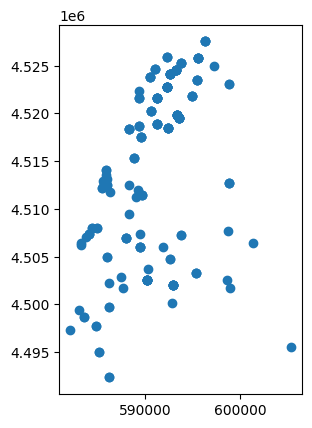

In [ ]:
accessible_stations.plot()

<Axes: >

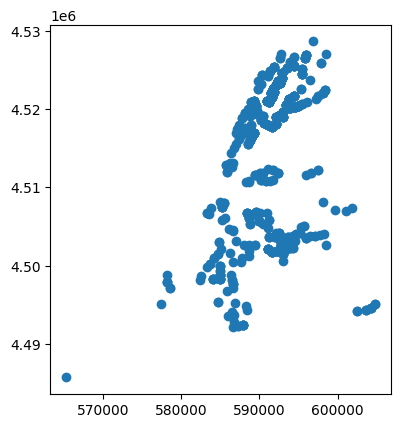

In [ ]:
inaccessible_stations.plot()

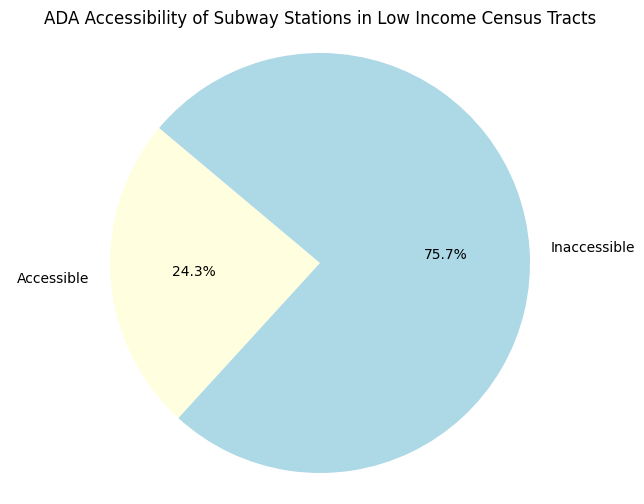

In [ ]:
# Define station types and their counts
station_types = ['Accessible', 'Inaccessible']
station_counts = [accessible_count, inaccessible_count]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(station_counts, labels=station_types, autopct='%1.1f%%', colors=['lightyellow', 'lightblue'], startangle=140)
plt.title('ADA Accessibility of Subway Stations in Low Income Census Tracts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# accessible_aggregate = accessible_stations.copy()
# accessible_aggregate.columns

In [ ]:
# accessible_aggregate = accessible_aggregate[['TRACT_FIPS', 'ADA']]
# accessible_aggregate.columns

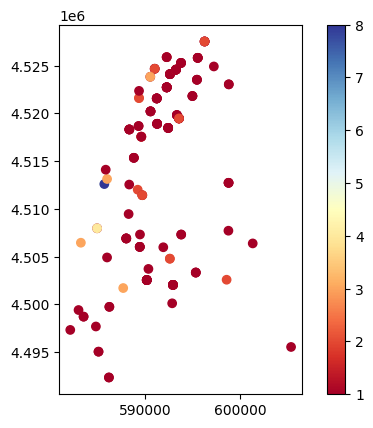

In [ ]:
accessible_aggregate = accessible_stations.groupby('TRACT_FIPS').agg({'ADA':'sum', 'geometry':'first'})
accessible_aggregate = gpd.GeoDataFrame(accessible_aggregate, geometry='geometry')
plot = accessible_aggregate.plot(column='ADA', cmap='RdYlBu', legend=True)
# Ensure legend is created
if plot.get_legend():
    # Reverse the order of the legend labels
    plot.get_legend().get_texts()[::-1]
# legend = plot.get_legend()
# legend.get_texts()[::-1] #adopted from chatGPT. Prompt: how do i reset my legend such that the darker shade shows higher frequency

In [ ]:
accessible_aggregate.head()

,ADA,geometry
TRACT_FIPS,,
001600,1,POINT (584986.892 4507969.651)
001903,1,POINT (592429.091 4518478.489)
002200,1,POINT (583044.422 4499409.681)
002500,2,POINT (589239.340 4512009.328)
002901,5,POINT (586029.975 4504913.933)


In [ ]:
#accessible stations within a quarter mile of low income census tracts
tract_counts=pd.merge(buffered_tracts, accessible_aggregate, on='TRACT_FIPS')

In [ ]:
tract_counts

,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI,POPULATI_1,POP20_SQMI,Shape_Leng,Shape_Le_1,...,50_74k9,75_99k9,100_149k9,150_199k9,>=200,Household_median_income,Mean_income,geometry_x,ADA,geometry_y
0,36005,038000,36005038000,4775,59687.5,0.08,4938,61725.0,0.019768,0.019768,...,13.8,11.7,9.8,2.9,3.6,41942,66674,"POLYGON ((596421.687 4525497.297, 596386.379 4...",1,POINT (595526.327 4525815.971)
1,36005,023502,36005023502,4324,108100.0,0.04,4417,110425.0,0.019156,0.019156,...,21.4,8.4,8.9,4.6,6.1,49286,64874,"POLYGON ((591862.459 4522805.514, 591863.944 4...",1,POINT (592280.757 4522728.064)
2,36061,023502,36061023502,2169,108450.0,0.02,2206,110300.0,0.010310,0.010310,...,12.9,13.5,12.3,1.1,6.2,42267,74780,"POLYGON ((589801.038 4520689.185, 589835.205 4...",1,POINT (592280.757 4522728.064)
3,36005,020900,36005020900,4835,96700.0,0.05,4823,96460.0,0.016789,0.016789,...,19.6,10.4,10.1,1.0,0.6,44769,52953,"POLYGON ((590850.673 4522068.513, 590850.652 4...",1,POINT (591235.866 4521567.620)
4,36005,011502,36005011502,4480,34461.5,0.13,4396,33815.4,0.024534,0.024534,...,14.5,3.1,12.2,0.5,1.9,28592,45880,"POLYGON ((593305.491 4519062.958, 593272.913 4...",1,POINT (593559.436 4519473.075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,36081,085500,36081085500,6848,136960.0,0.05,6889,137780.0,0.015405,0.015405,...,15.2,8.1,8.7,2.2,8.0,41315,66637,"POLYGON ((599470.886 4512202.895, 599305.037 4...",1,POINT (598753.935 4512729.275)
181,36081,087100,36081087100,6560,41000.0,0.16,6373,39831.3,0.037568,0.037568,...,9.8,10.5,8.9,12.8,7.2,46841,82068,"POLYGON ((597667.942 4512450.473, 597668.148 4...",1,POINT (598753.935 4512729.275)
182,36081,056100,36081056100,20,17.9,1.12,20,17.9,0.105395,0.105395,...,0.0,0.0,0.0,57.1,0.0,0,0,"POLYGON ((592430.329 4505189.219, 592430.262 4...",2,POINT (592604.473 4504785.299)
183,36081,024600,36081024600,1,8.3,0.12,1,8.3,0.026027,0.026027,...,0.0,0.0,0.0,0.0,0.0,0,0,"POLYGON ((601063.676 4505918.585, 601023.720 4...",1,POINT (601282.220 4506384.487)


In [ ]:
tract_counts.set_geometry('geometry_x', inplace=True)

In [ ]:
tract_counts['geometry_x'] = tract_counts['geometry_x'].to_crs(epsg=32618)


<Axes: >

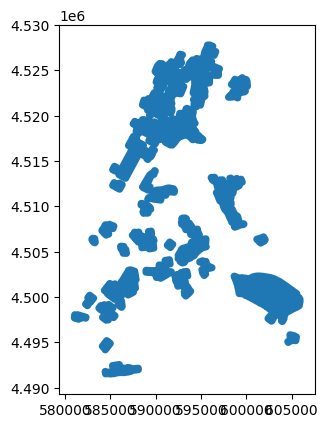

In [ ]:
tract_counts.plot()

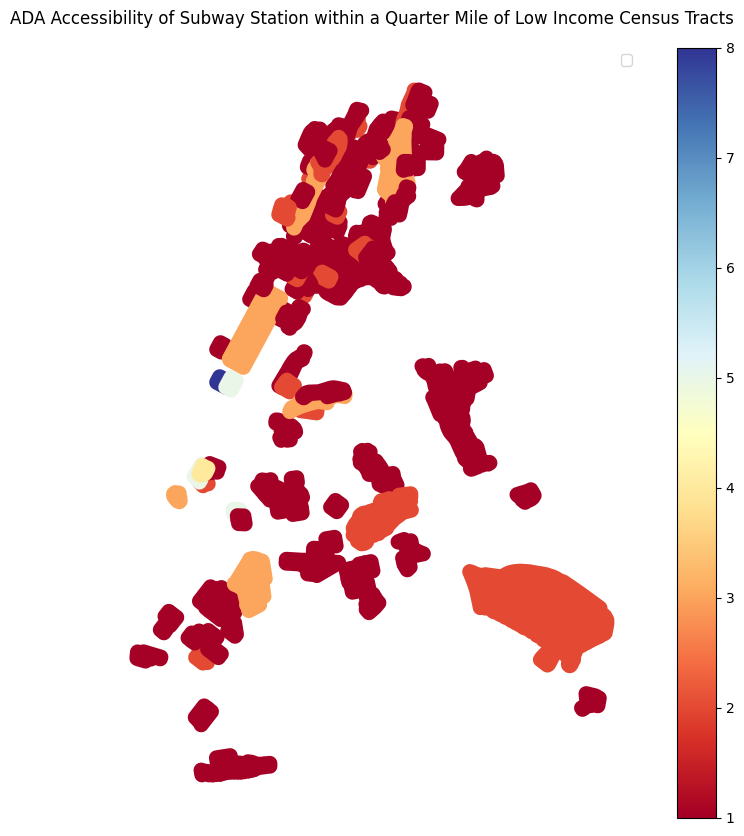

Accessible Stations: 201
Inaccessible Stations: 625


In [ ]:
# Visualize the data on a map
fig, ax = plt.subplots(figsize=(10, 10))
# census_tracts.plot(color = 'grey', ax=ax)
tract_counts.plot(column='ADA', cmap='RdYlBu', legend=True,ax=ax)

# min_value = tract_counts['ADA'].min()
# vmin = max(0, min_value)

plt.title('ADA Accessibility of Subway Station within a Quarter Mile of Low Income Census Tracts')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
ax.set_axis_off()
plt.legend()
plt.show()



print(f'Accessible Stations: {accessible_count}')
print(f'Inaccessible Stations: {inaccessible_count}')



In [ ]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.1 MB/s eta 0:00:00


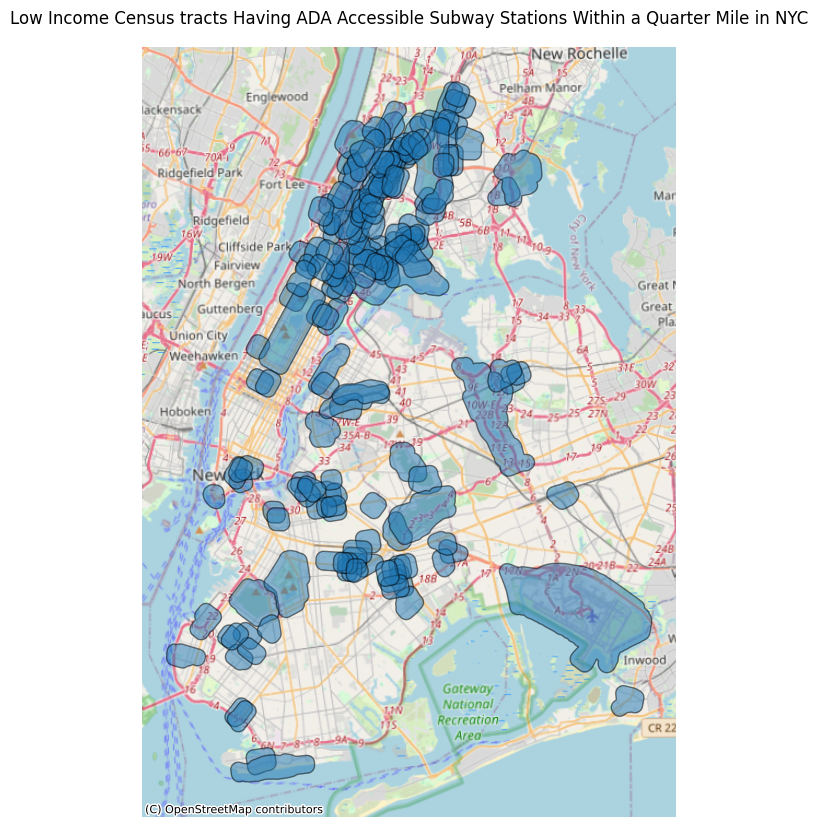

In [ ]:
#Add basemap using Contextily
import contextily as ctx

# Plot wit Geopandas
ax = tract_counts.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# Set title and labels
ax.set_title("Low Income Census tracts Having ADA Accessible Subway Stations Within a Quarter Mile in NYC")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis('off')
ctx.add_basemap(ax, crs=tract_counts.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


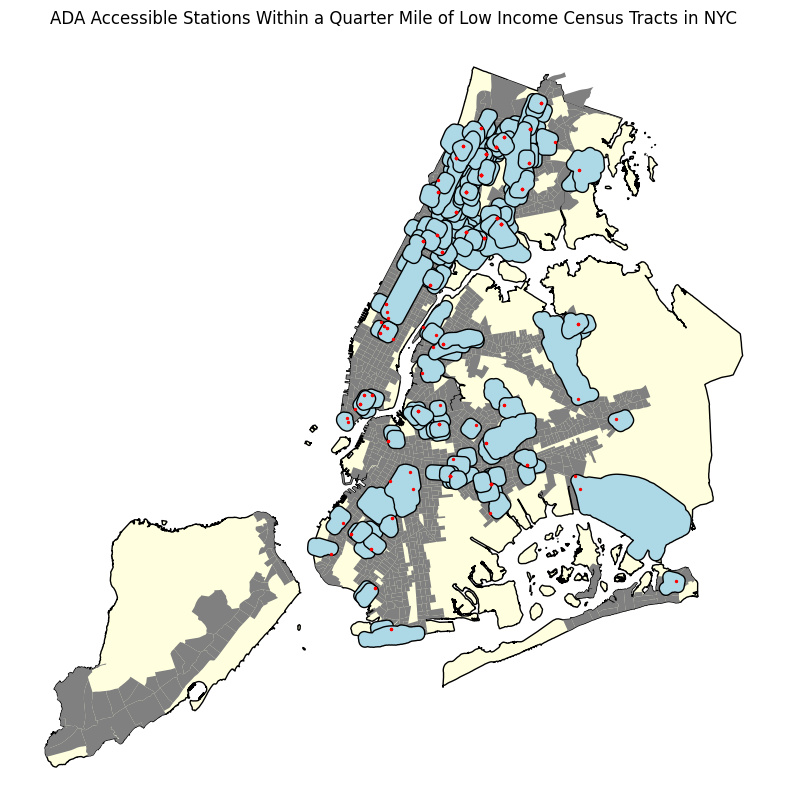

In [ ]:

crs = 'EPSG:32618'

# Project tract_counts to the target CRS
tract_counts_utm = tract_counts.to_crs(crs)
nyc_borough_boundaries = gpd.read_file('//content/drive/MyDrive/FinalProject_Abdulrazaq/NYCBoroughBoundDissolved').to_crs(crs)
tract_counts_utm = tract_counts_utm.set_geometry('geometry_x')
accessible_stations=accessible_stations.to_crs(crs)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("ADA Accessible Stations Within a Quarter Mile of Low Income Census Tracts in NYC")
census_tracts_utm.plot(column='FIPS',color='grey', ax=ax)
accessible_stations.plot(ax=ax, markersize=2, color='r', zorder=2)
tract_counts_utm.plot(ax=ax, facecolor='lightblue', edgecolor='k', zorder=1)
# accessible_aggregate.plot(ax=ax, markersize=5, color='r', zorder=1)
nyc_borough_boundaries.plot(ax=ax,facecolor='lightyellow', edgecolor='k', zorder=0)

ax.axis('off')

plt.savefig('large_scale_map.eps')
plt.show()


In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
import osmnx as ox

In [ ]:
print(tract_counts['Geographic'].unique())

['Census Tract 380; Bronx County; New York'
 'Census Tract 235.02; Bronx County; New York'
 'Census Tract 235.02; New York County; New York'
 'Census Tract 209; Bronx County; New York'
 'Census Tract 115.02; Bronx County; New York'
 'Census Tract 71; Bronx County; New York'
 'Census Tract 67; Bronx County; New York'
 'Census Tract 251; Bronx County; New York'
 'Census Tract 251; New York County; New York'
 'Census Tract 213.02; Bronx County; New York'
 'Census Tract 129.01; Bronx County; New York'
 'Census Tract 406; Bronx County; New York'
 'Census Tract 431.02; Bronx County; New York'
 'Census Tract 411; Bronx County; New York'
 'Census Tract 51; Bronx County; New York'
 'Census Tract 159; Bronx County; New York'
 'Census Tract 328; Bronx County; New York'
 'Census Tract 119; Bronx County; New York'
 'Census Tract 119; New York County; New York'
 'Census Tract 73; Bronx County; New York'
 'Census Tract 403.02; Bronx County; New York'
 'Census Tract 266.02; Bronx County; New York'
 'C

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(560884.7375735468, 608725.695398117, 4481481.821952184, 4531888.137472453)

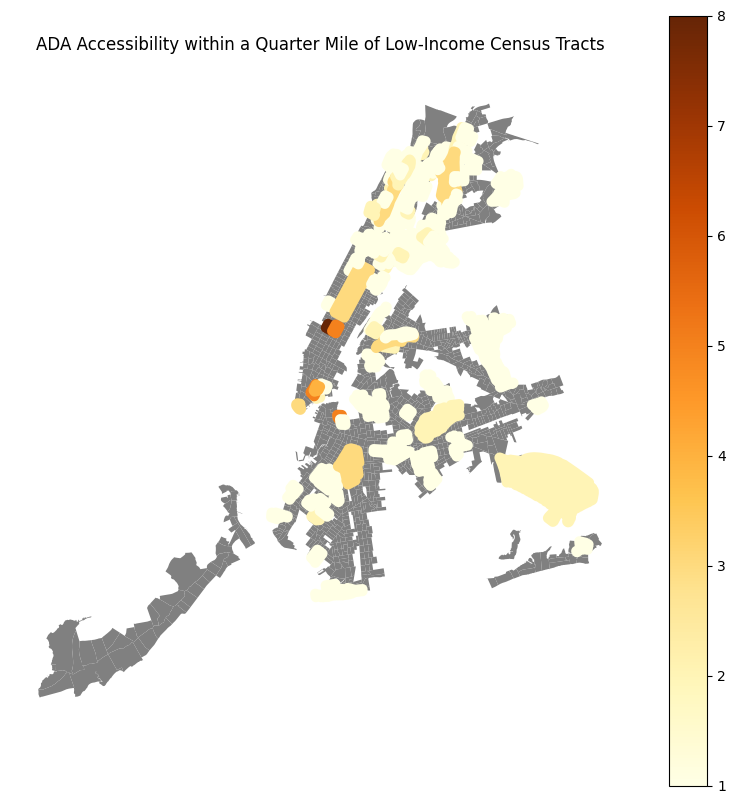

In [ ]:
#more visulas
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the geometries from the census_tracts GeoDataFrame with a grey color
census_tracts_utm.plot(column='FIPS',color='grey', ax=ax)

# Plot the tract_counts GeoDataFrame, use values in the 'ADA' column to color polygon accordingly
# and add a legend
norm = mcolors.Normalize(vmin=1, vmax=tract_counts['ADA'].max())
tract_counts.plot(column='ADA', cmap='YlOrBr', legend=True,norm=norm, ax=ax)

ax.set_title("ADA Accessibility within a Quarter Mile of Low-Income Census Tracts")
ax.axis('off')